<a href="https://colab.research.google.com/github/williamtbarker/ML4Molecules/blob/main/exercise_2_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

For this task you will use the BBBP dataset. Perform the following -

1. split the dataset with `RandomSplitter`, `ScaffoldSplitter` and `MolecularWeightSplitter`from deepchem. You can limit the split to train-test split with 80:20 split.
2. for the above splits, compare the distribution of the target value (p_np) in the train and test splits. Which split give the same distribution for train and test.
3. compare the distribution of molecular weights in the splits. Which split gives the same distribution for train and test.

In [3]:
# 1. split the dataset.
import pandas as pd
df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv')
df.head()


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [29]:
# Create the DeepChem dataset
# Note: Ensure that your model can handle 'smiles' strings as features.
dataset = dc.data.NumpyDataset(X=df['smiles'], y=df['p_np'], ids=df['smiles'])


Hint: You can use matplotlib or seaborn to plot. [This](https://youtu.be/hNNRVRmZO1s?t=8315) workshop video shows how to plot.

In [30]:
# Define splitters
random_splitter = dc.splits.RandomSplitter()
scaffold_splitter = dc.splits.ScaffoldSplitter()
mw_splitter = dc.splits.MolecularWeightSplitter()

# Perform the splits
train_random, test_random, _ = random_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0, frac_test=0.2)
train_scaffold, test_scaffold, _ = scaffold_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0, frac_test=0.2)
train_mw, test_mw, _ = mw_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0, frac_test=0.2)



[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not removing hydrogen atom without neighbors
[20:21:26] WARNING: not r

In [31]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt

def calculate_molecular_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return CalcExactMolWt(mol)
    return None

# Add a molecular weight column to the original DataFrame
df['MW'] = df['smiles'].apply(calculate_molecular_weight)



[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:01] WARNING: not removing hydrogen atom without neighbors
[20:23:02] WARNING: not r

Remember to install deepchem. You can set `frac_valid = 0` here.

In [32]:
# Function to get molecular weights for a given split
def get_mw_from_split(split_dataset):
    return df.loc[df['smiles'].isin(split_dataset.ids)]['MW']

# Get molecular weights for each split group
mw_train_random = get_mw_from_split(train_random)
mw_test_random = get_mw_from_split(test_random)

mw_train_scaffold = get_mw_from_split(train_scaffold)
mw_test_scaffold = get_mw_from_split(test_scaffold)

mw_train_mw = get_mw_from_split(train_mw)
mw_test_mw = get_mw_from_split(test_mw)


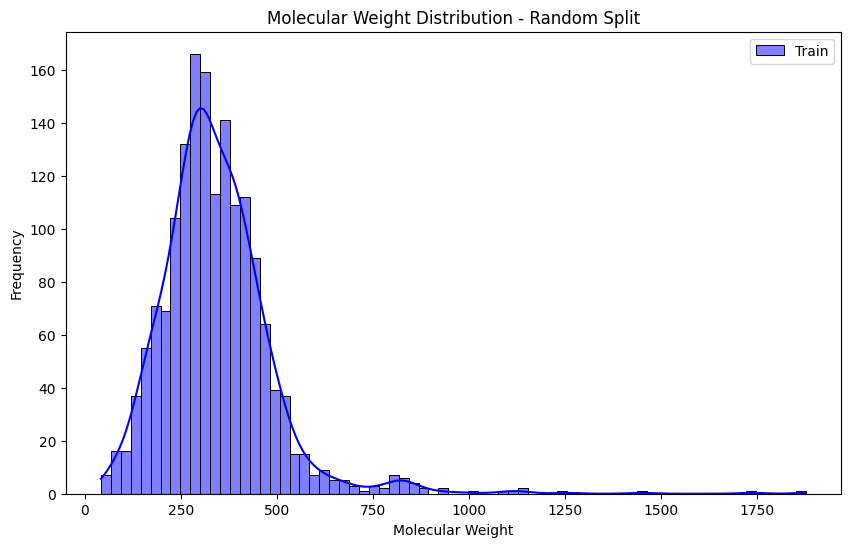

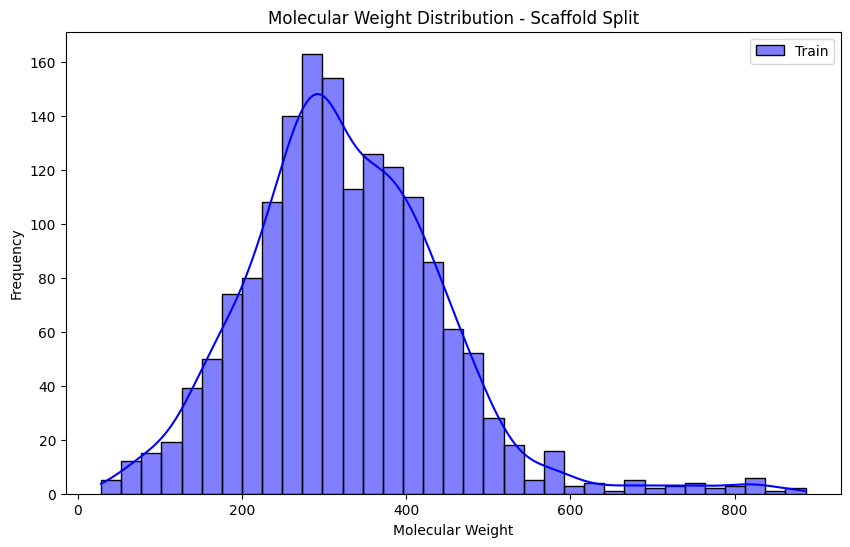

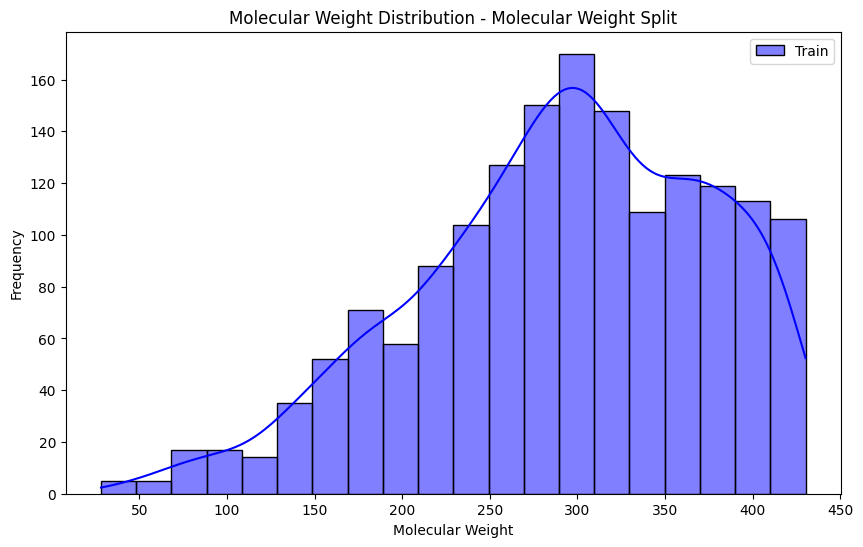

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mw_distribution(train_mw, test_mw, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(train_mw, color='blue', label='Train', kde=True)
    sns.histplot(test_mw, color='red', label='Test', kde=True)
    plt.xlabel('Molecular Weight')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for each split type
plot_mw_distribution(mw_train_random, mw_test_random, 'Molecular Weight Distribution - Random Split')
plot_mw_distribution(mw_train_scaffold, mw_test_scaffold, 'Molecular Weight Distribution - Scaffold Split')
plot_mw_distribution(mw_train_mw, mw_test_mw, 'Molecular Weight Distribution - Molecular Weight Split')


Hint: Use the `ExactMolWeight` from [RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html) to get the molecular weight for entries in the dataset. Then plot the distribution.